In [23]:
import pandas as pd
import seaborn as sns

In [24]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [25]:
train['Label'].value_counts()

Label
0    35179
2     7756
1     1825
Name: count, dtype: int64

In [26]:
train.shape

(44760, 21)

In [27]:
train = train.drop(columns=['SNo'])
train_features = train.drop(columns=['Label'])


In [29]:
print(train.shape)
train.drop_duplicates(subset=train_features.columns)

(44760, 20)


,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,T200,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,time,Label
0,21.707953,275.0000,78.909431,-58.805229,36.200672,-58.260475,-0.722955,0.022321,97497.79688,97498.90625,227.119232,273.045563,1.390000e-05,302.350861,300.026764,66.339836,12400.22754,66.241585,20031024,1
2,21.473272,275.0000,80.641357,-42.340290,58.060246,-56.400234,26.484743,0.022204,96611.60156,96611.60156,229.172897,273.580810,1.440000e-05,302.350861,299.798828,66.165573,12371.33203,66.165268,20031024,1
4,21.707953,275.3125,76.891205,-45.996342,42.691631,-48.993065,10.246445,0.022328,98168.55469,98175.43750,224.642563,272.152283,9.890000e-06,302.462708,300.160187,66.880089,12386.88574,66.275246,20031024,1
6,21.473272,275.3125,76.771362,-33.228142,57.195755,-46.387169,25.953285,0.022245,97758.07031,97758.10938,225.363648,271.941498,9.270000e-06,302.462708,300.021759,66.232269,12359.41309,66.228661,20031024,1
8,21.707953,275.6250,74.268501,-37.684723,42.142948,-41.747562,14.927589,0.022106,98841.56250,98852.13281,222.947571,271.887268,7.160000e-06,302.462708,300.101929,67.174088,12392.40234,66.251289,20031024,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44731,13.494133,253.4375,68.789070,19.561129,-26.216906,25.676321,-7.471170,0.019075,100311.89840,100311.89840,218.761704,269.819367,9.910000e-06,301.428863,297.852966,65.575958,12420.47949,65.575958,20000629,1
44732,13.024772,253.7500,57.838215,27.580883,2.324419,25.678833,8.375986,0.021070,99680.51563,99680.51563,218.561432,269.597809,1.990000e-07,301.890808,301.103760,66.546562,12340.12109,66.546562,20011207,1
44741,13.494133,253.7500,73.321968,21.677361,-22.360260,27.409748,-1.814677,0.019768,100134.93750,100134.93750,220.888092,270.320007,1.410000e-05,301.428863,298.425842,65.764488,12476.83887,65.764488,20000629,1
44742,13.259452,253.7500,57.735180,29.336315,3.866159,30.041025,6.957835,0.021593,99285.27344,99285.27344,218.439926,270.495758,1.200000e-07,301.878662,300.797058,66.483833,12338.07715,66.483833,20011207,0


<Axes: xlabel='Label', ylabel='count'>

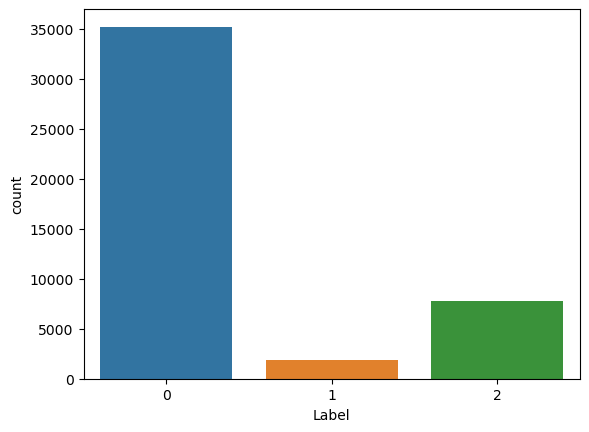

In [31]:
sns.countplot(x=train['Label'], data=train)

We see that we have quite a few duplicate rows. Some of these rows have the same feature values, but different data. For these records we have decided to keep the median label. In the case of ties, we keep the first example seen

In [32]:
from scipy import stats
train_dropped_dups = train.groupby([x for x in train.columns if x!='Label'], as_index=False).agg({'Label': lambda x:stats.mode(x)[0]}).reset_index(drop=True)
print(train_dropped_dups.shape)
train_dropped_dups['Label'].value_counts()

(21120, 20)


Label
0    17488
2     2929
1      703
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

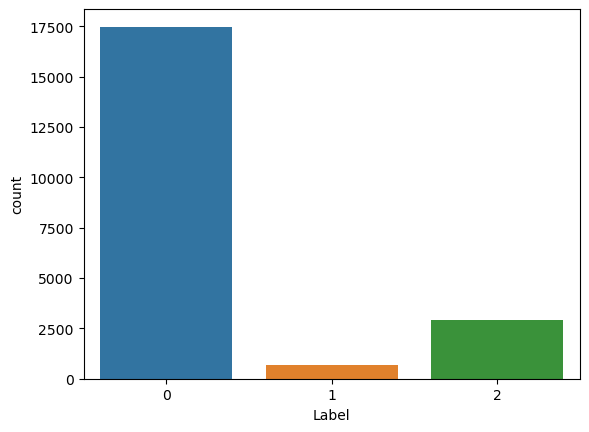

In [33]:
sns.countplot(x=train_dropped_dups['Label'], data=train_dropped_dups)

Experimenting with SMOTE-based methods

In [34]:
from imblearn.combine import SMOTETomek

smo_tek = SMOTETomek(random_state=0)
X_smotek, y_smotek = smo_tek.fit_resample(train.drop(columns=['Label']), train['Label'])

<Axes: xlabel='Label'>

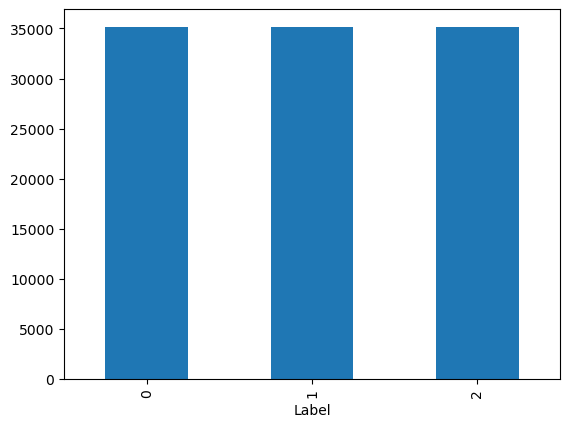

In [35]:
y_smotek.value_counts().plot(kind='bar')

In [36]:
y_smotek.value_counts()

Label
0    35162
1    35119
2    35106
Name: count, dtype: int64

In [37]:
y_smotek.shape

(105387,)

In [38]:
from imblearn.combine import SMOTEENN

smo_een = SMOTEENN(random_state=0)
X_smoteenn, y_smoteenn = smo_een.fit_resample(train.drop(columns=['Label']), train['Label'])

<Axes: xlabel='Label'>

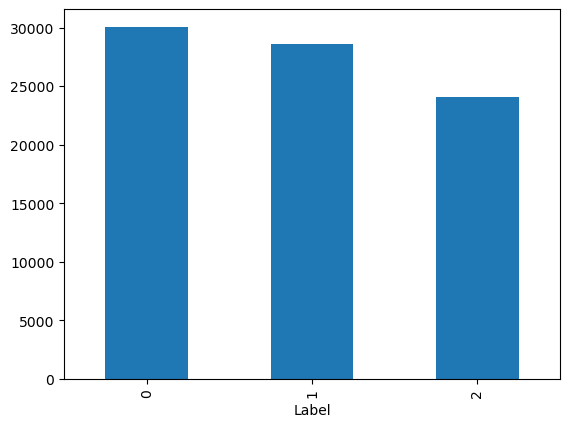

In [39]:
y_smoteenn.value_counts().plot(kind='bar')

In [40]:
y_smoteenn.value_counts()

Label
0    30071
1    28570
2    24060
Name: count, dtype: int64

In [41]:
y_smoteenn.shape

(82701,)

Testing method to parse the time feature into a more useful 'year' and 'month' format

In [42]:
def time_features(df):
    df['year'] = train['time'].astype(str).str[0:4]
    df['month'] = train['time'].astype(str).str[4:6]
    df = df.drop(columns=['time'])
    return df

In [43]:
train_dropped_dups = time_features(train_dropped_dups)
train_dropped_dups

,lat,lon,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,...,T500,PRECT,TS,TREFHT,Z1000,Z200,ZBOT,Label,year,month
0,-31.095176,353.1250,9.119848,1.598317,1.470260,0.810265,2.363183,0.004364,102511.0156,102511.0156,...,255.653427,1.260000e-15,290.665344,286.344299,207.444214,11909.32422,62.648720,0,2003,10
1,-31.095176,353.1250,9.498385,3.720647,7.738389,3.792771,7.983106,0.005686,102429.6016,102429.6016,...,256.829498,0.000000e+00,291.421783,288.094391,202.014511,12044.68750,63.036098,0,2003,10
2,-31.095176,353.1250,9.570622,-0.449374,4.436312,-1.916012,5.904305,0.005256,102886.1641,102886.1641,...,252.715546,4.810000e-15,290.316620,286.040802,237.781067,11851.70801,62.586845,0,2003,10
3,-31.095176,353.1250,9.863693,-7.730425,-0.918892,-7.793533,-0.627037,0.005288,103979.4063,103979.4063,...,252.840958,1.150000e-13,290.339081,287.221649,326.891113,11988.68359,62.845680,0,2003,10
4,-31.095176,353.1250,10.451710,-7.256196,-3.592936,-8.562844,-0.678384,0.005993,103489.4609,103489.4609,...,253.231186,1.340000e-14,290.483887,287.476013,287.984039,11965.81445,62.924049,0,2003,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21115,24.054759,277.8125,57.796329,-6.420532,17.582048,-11.166381,8.585260,0.020651,100927.5391,100927.5469,...,267.621674,2.080000e-07,301.819183,300.872101,82.221512,12414.16797,66.490471,1,2006,06
21116,24.054759,277.8125,58.329323,-8.095085,6.572595,-13.351055,9.610909,0.017898,100664.0234,100664.0313,...,268.883240,4.600000e-08,302.160065,298.892578,65.812500,12429.91602,65.812042,1,2002,02
21117,24.054759,277.8125,58.517265,-4.785640,3.789390,-8.509462,2.313743,0.021407,100948.1953,100948.1953,...,269.230347,8.800000e-08,303.307373,302.306854,84.499649,12492.16602,66.848801,0,2002,02
21118,24.054759,277.8125,62.778736,-10.072424,4.102436,-12.268980,-2.449703,0.020941,101060.1953,101060.2031,...,267.739990,4.550000e-07,302.993195,301.496399,94.111633,12432.50586,66.610916,0,2002,02


<Axes: >

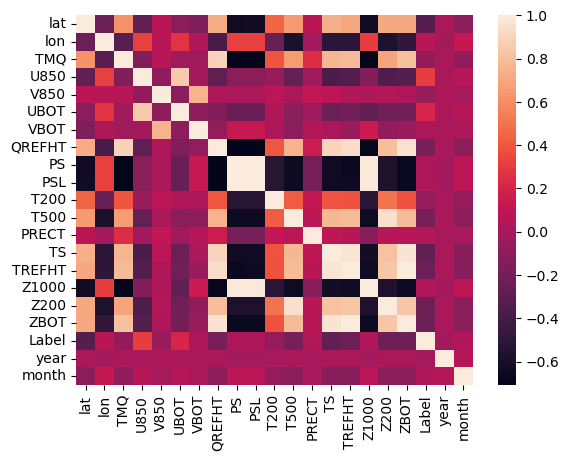

In [44]:
correlation = train_dropped_dups.corr()
sns.heatmap(correlation, 
            xticklabels=correlation.columns,
            yticklabels=correlation.columns)